In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
ca_data = pd.read_csv('california_housing.csv')
ca_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,2.1827,26.0,4.521429,0.921429,305.0,2.178571,40.05,-122.10,0
1,3.0755,32.0,4.623068,0.983353,3868.0,4.599287,32.77,-117.06,0
2,1.8235,40.0,4.701149,1.126437,928.0,3.555556,37.75,-122.16,0
3,1.4625,37.0,4.247845,1.105603,1673.0,3.605603,33.99,-118.28,0
4,1.9063,13.0,3.453125,0.984375,286.0,4.468750,33.97,-118.16,0
...,...,...,...,...,...,...,...,...,...
20629,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84,1
20630,5.6790,20.0,6.401274,1.070064,457.0,2.910828,38.56,-122.05,1
20631,1.9327,10.0,5.789474,1.078947,898.0,3.938596,38.57,-121.92,1
20632,3.7500,38.0,5.275229,0.981651,259.0,2.376147,38.72,-121.90,1


In [3]:
ca_data.shape

(20634, 9)

In [4]:
ca_data.size

185706

In [5]:
ca_data.dtypes

MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
price_above_median      int64
dtype: object

In [6]:
ca_data['HouseAge'] = ca_data['HouseAge'].astype(int)
ca_data['Population'] = ca_data['Population'].astype(int)
ca_data.dtypes
# HouseAge and Population can be represented as ints as they all end in .0

MedInc                float64
HouseAge                int64
AveRooms              float64
AveBedrms             float64
Population              int64
AveOccup              float64
Latitude              float64
Longitude             float64
price_above_median      int64
dtype: object

In [7]:
ca_data.duplicated().sum()

0

In [8]:
ca_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
count,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000
mean,3.870795,28.640399,5.429171,1.096628,1425.398081,3.070449,35.631722,-119.569594,0.500000
std,1.899796,12.584629,2.474393,0.473929,1132.137403,10.387501,2.135738,2.003457,0.500012
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.000000
25%,2.563925,18.000000,4.440930,1.006067,787.000000,2.429649,33.930000,-121.800000,0.000000
50%,3.534950,29.000000,5.229190,1.048780,1166.000000,2.817937,34.260000,-118.490000,0.500000
75%,4.743550,37.000000,6.052381,1.099499,1725.000000,3.282249,37.710000,-118.010000,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,1.000000


In [9]:
# From the mean and max of MedInc, one can clearly see how wealthier neighborhoods exist in California, most likely Bay Area and LA area.
# The min in AveBedrooms being 0.33 seems weird to me
# It also includes dense neighborhoods with max in Population being 35682
# Differences in latitude and longitude allows one to clearly see data is from all over California

<Axes: xlabel='HouseAge', ylabel='Count'>

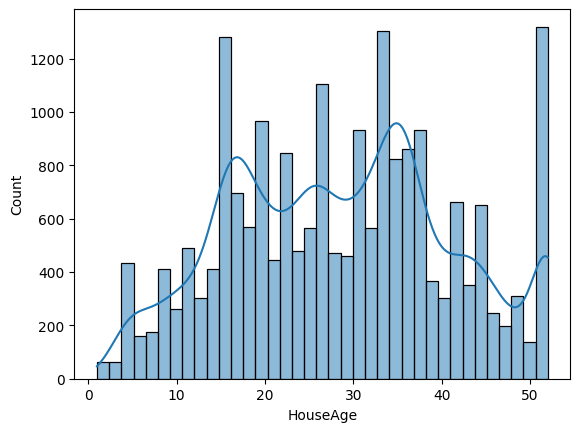

In [10]:
sns.histplot(data=ca_data['HouseAge'], kde = True )

In [11]:
# More clearly able to see house age trend almost following a Gaussian with spikes around 15, 25, 35, and 50 years of age

<Axes: xlabel='MedInc', ylabel='Count'>

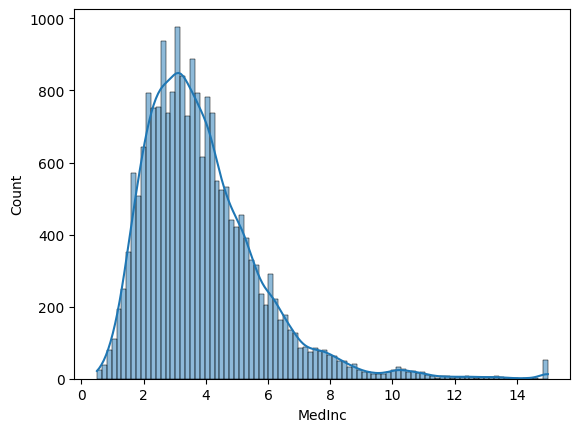

In [12]:
sns.histplot(data=ca_data['MedInc'], kde = True )

In [13]:
# Histogram shows the MedInc peaking around 35,000, also follows Gaussian from 0 to 80000

<Axes: xlabel='Latitude'>

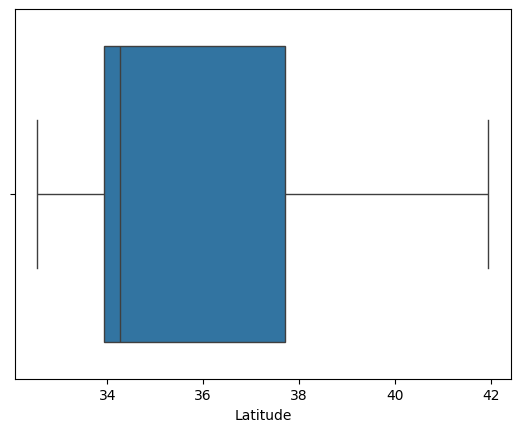

In [14]:
sns.boxplot(data=ca_data, x='Latitude')

<Axes: xlabel='Longitude'>

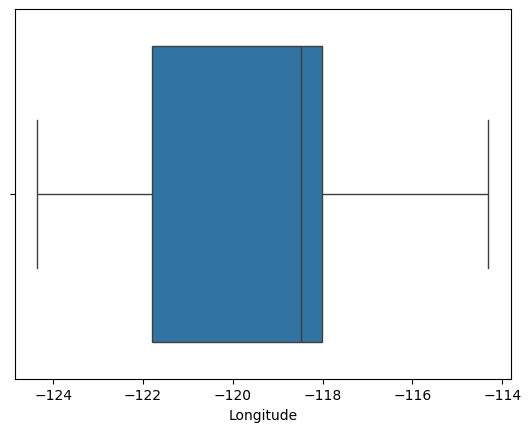

In [15]:
sns.boxplot(data=ca_data, x='Longitude')

In [16]:
# Shows roughly the Latitude and Longitude borders of California

In [17]:
from sklearn.model_selection import train_test_split

X = ca_data.drop('price_above_median', axis=1)
y = ca_data['price_above_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

In [20]:
knn_baseline = KNeighborsClassifier(n_neighbors=3)
knn_baseline.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred_test = knn_baseline.predict(X_test_scaled)
print("Baseline KNN Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))

print("Baseline KNN Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))

y_pred_train = knn_baseline.predict(X_train_scaled)
print("Baseline KNN Classification Report (Training Data):\n", classification_report(y_train, y_pred_train))
print("Baseline KNN Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train))


Baseline KNN Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      3095
           1       0.83      0.83      0.83      3096

    accuracy                           0.83      6191
   macro avg       0.83      0.83      0.83      6191
weighted avg       0.83      0.83      0.83      6191

Baseline KNN Confusion Matrix (Test Data):
 [[2574  521]
 [ 531 2565]]
Baseline KNN Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7222
           1       0.91      0.91      0.91      7221

    accuracy                           0.91     14443
   macro avg       0.91      0.91      0.91     14443
weighted avg       0.91      0.91      0.91     14443

Baseline KNN Confusion Matrix (Training Data):
 [[6578  644]
 [ 681 6540]]


In [22]:
param_grid = {"n_neighbors": np.arange(1, 50)}

In [23]:
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
knn_gscv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [25]:
knn_gscv.best_params_

{'n_neighbors': 13}

In [26]:
best_knn = knn_gscv.best_estimator_

In [27]:
y_pred_test_best = best_knn.predict(X_test_scaled)

In [30]:
print("Tuned KNN Classification Report (Test Data):\n", classification_report(y_test, y_pred_test_best))

Tuned KNN Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      3095
           1       0.83      0.84      0.84      3096

    accuracy                           0.84      6191
   macro avg       0.84      0.84      0.84      6191
weighted avg       0.84      0.84      0.84      6191



In [31]:
print("Tuned KNN Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test_best))

Tuned KNN Confusion Matrix (Test Data):
 [[2575  520]
 [ 496 2600]]


In [32]:
y_pred_train_best = best_knn.predict(X_train_scaled)
print("Tuned KNN Classification Report (Training Data):\n", classification_report(y_train, y_pred_train_best))
print("Tuned KNN Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train_best))


Tuned KNN Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      7222
           1       0.86      0.86      0.86      7221

    accuracy                           0.86     14443
   macro avg       0.86      0.86      0.86     14443
weighted avg       0.86      0.86      0.86     14443

Tuned KNN Confusion Matrix (Training Data):
 [[6223  999]
 [1004 6217]]


In [33]:
knn_gscv_recall = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="recall")
knn_gscv_recall.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='recall')

In [34]:
knn_gscv_recall.best_params_

{'n_neighbors': 13}

In [35]:
best_knn_recall = knn_gscv_recall.best_estimator_

In [36]:
y_pred_test_recall = best_knn_recall.predict(X_test_scaled)
print("Recall-Optimized KNN Classification Report (Test Data):\n", classification_report(y_test, y_pred_test_recall))
print("Recall-Optimized KNN Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test_recall))

Recall-Optimized KNN Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      3095
           1       0.83      0.84      0.84      3096

    accuracy                           0.84      6191
   macro avg       0.84      0.84      0.84      6191
weighted avg       0.84      0.84      0.84      6191

Recall-Optimized KNN Confusion Matrix (Test Data):
 [[2575  520]
 [ 496 2600]]


In [37]:
y_pred_train_recall = best_knn_recall.predict(X_train_scaled)
print("Recall-Optimized KNN Classification Report (Training Data):\n", classification_report(y_train, y_pred_train_recall))
print("Recall-Optimized KNN Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train_recall))

Recall-Optimized KNN Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      7222
           1       0.86      0.86      0.86      7221

    accuracy                           0.86     14443
   macro avg       0.86      0.86      0.86     14443
weighted avg       0.86      0.86      0.86     14443

Recall-Optimized KNN Confusion Matrix (Training Data):
 [[6223  999]
 [1004 6217]]


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt_baseline = DecisionTreeClassifier(random_state=1)
dt_baseline.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [40]:
y_pred_test = dt_baseline.predict(X_test)
print("Baseline Decision Tree Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))
print("Baseline Decision Tree Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))

Baseline Decision Tree Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      3095
           1       0.83      0.84      0.84      3096

    accuracy                           0.83      6191
   macro avg       0.83      0.83      0.83      6191
weighted avg       0.83      0.83      0.83      6191

Baseline Decision Tree Confusion Matrix (Test Data):
 [[2555  540]
 [ 489 2607]]


In [41]:
y_pred_train = dt_baseline.predict(X_train)
print("Baseline Decision Tree Classification Report (Training Data):\n", classification_report(y_train, y_pred_train))
print("Baseline Decision Tree Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train))

Baseline Decision Tree Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7222
           1       1.00      1.00      1.00      7221

    accuracy                           1.00     14443
   macro avg       1.00      1.00      1.00     14443
weighted avg       1.00      1.00      1.00     14443

Baseline Decision Tree Confusion Matrix (Training Data):
 [[7222    0]
 [   0 7221]]


In [43]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_gscv = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, scoring="accuracy")
dt_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [44]:
dt_gscv.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [46]:
best_dt = dt_gscv.best_estimator_

In [47]:
y_pred_test_best = best_dt.predict(X_test)
print("Tuned Decision Tree Classification Report (Test Data):\n", classification_report(y_test, y_pred_test_best))
print("Tuned Decision Tree Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test_best))

Tuned Decision Tree Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      3095
           1       0.85      0.84      0.85      3096

    accuracy                           0.85      6191
   macro avg       0.85      0.85      0.85      6191
weighted avg       0.85      0.85      0.85      6191

Tuned Decision Tree Confusion Matrix (Test Data):
 [[2651  444]
 [ 504 2592]]


In [49]:
y_pred_train_best = best_dt.predict(X_train)
print("Tuned Decision Tree Classification Report (Training Data):\n", classification_report(y_train, y_pred_train_best))
print("Tuned Decision Tree Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train_best))

Tuned Decision Tree Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7222
           1       0.92      0.89      0.91      7221

    accuracy                           0.91     14443
   macro avg       0.91      0.91      0.91     14443
weighted avg       0.91      0.91      0.91     14443

Tuned Decision Tree Confusion Matrix (Training Data):
 [[6699  523]
 [ 796 6425]]


In [51]:
dt_gscv_recall = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, scoring="recall")
dt_gscv_recall.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [52]:
dt_gscv_recall.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [53]:
best_dt_recall = dt_gscv_recall.best_estimator_

In [54]:
y_pred_test_recall = best_dt_recall.predict(X_test)
print("Recall-Optimized Decision Tree Classification Report (Test Data):\n", classification_report(y_test, y_pred_test_recall))
print("Recall-Optimized Decision Tree Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test_recall))

Recall-Optimized Decision Tree Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      3095
           1       0.85      0.84      0.84      3096

    accuracy                           0.84      6191
   macro avg       0.84      0.84      0.84      6191
weighted avg       0.84      0.84      0.84      6191

Recall-Optimized Decision Tree Confusion Matrix (Test Data):
 [[2621  474]
 [ 489 2607]]


In [55]:
y_pred_train_recall = best_dt_recall.predict(X_train)
print("Recall-Optimized Decision Tree Classification Report (Training Data):\n", classification_report(y_train, y_pred_train_recall))
print("Recall-Optimized Decision Tree Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train_recall))

Recall-Optimized Decision Tree Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      7222
           1       0.93      0.90      0.92      7221

    accuracy                           0.92     14443
   macro avg       0.92      0.92      0.92     14443
weighted avg       0.92      0.92      0.92     14443

Recall-Optimized Decision Tree Confusion Matrix (Training Data):
 [[6717  505]
 [ 695 6526]]


In [56]:
models = [dt_baseline, best_dt, best_dt_recall]

for model in models:
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    print(f"Model: {model}")
    print(f"Accuracy on test data: {accuracy_test:.2f}")
    print(f"Recall on test data: {recall_test:.2f}")
    print(f"Precision on test data: {precision_test:.2f}")
    print(f"F1-score on test data: {f1_test:.2f}")
    print("---")

Model: DecisionTreeClassifier(random_state=1)
Accuracy on test data: 0.83
Recall on test data: 0.84
Precision on test data: 0.83
F1-score on test data: 0.84
---
Model: DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=1)
Accuracy on test data: 0.85
Recall on test data: 0.84
Precision on test data: 0.85
F1-score on test data: 0.85
---
Model: DecisionTreeClassifier(max_depth=10, random_state=1)
Accuracy on test data: 0.84
Recall on test data: 0.84
Precision on test data: 0.85
F1-score on test data: 0.84
---


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_baseline = RandomForestClassifier(random_state=1)
rf_baseline.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [60]:
y_pred_test = rf_baseline.predict(X_test)

In [61]:
print("Baseline Random Forest Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))
print("Baseline Random Forest Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))

Baseline Random Forest Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      3095
           1       0.89      0.90      0.90      3096

    accuracy                           0.90      6191
   macro avg       0.90      0.90      0.90      6191
weighted avg       0.90      0.90      0.90      6191

Baseline Random Forest Confusion Matrix (Test Data):
 [[2766  329]
 [ 307 2789]]


In [62]:
y_pred_train = rf_baseline.predict(X_train)
print("Baseline Random Forest Classification Report (Training Data):\n", classification_report(y_train, y_pred_train))
print("Baseline Random Forest Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train))

Baseline Random Forest Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7222
           1       1.00      1.00      1.00      7221

    accuracy                           1.00     14443
   macro avg       1.00      1.00      1.00     14443
weighted avg       1.00      1.00      1.00     14443

Baseline Random Forest Confusion Matrix (Training Data):
 [[7222    0]
 [   0 7221]]


In [63]:
param_grid = {
    'n_estimators': np.arange(start=10, stop=100, step=10),  # Number of trees
    'max_depth': [None, 5, 10, 20],  # Maximum depth of each tree
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'class_weight': [None, {0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}]  # Class weights
}

In [64]:
rf_gscv = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
rf_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': [None, {0: 0.1, 1: 0.9},
                                          {0: 0.2, 1: 0.8}],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='accuracy')

In [65]:
rf_gscv.best_params_

{'class_weight': None,
 'max_depth': None,
 'min_samples_leaf': 1,
 'n_estimators': 90}

In [66]:
best_rf = rf_gscv.best_estimator_

In [67]:
y_pred_test_best = best_rf.predict(X_test)
print("Tuned Random Forest Classification Report (Test Data):\n", classification_report(y_test, y_pred_test_best))
print("Tuned Random Forest Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test_best))

Tuned Random Forest Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      3095
           1       0.89      0.90      0.90      3096

    accuracy                           0.90      6191
   macro avg       0.90      0.90      0.90      6191
weighted avg       0.90      0.90      0.90      6191

Tuned Random Forest Confusion Matrix (Test Data):
 [[2765  330]
 [ 312 2784]]


In [68]:
y_pred_train_best = best_rf.predict(X_train)
print("Tuned Random Forest Classification Report (Training Data):\n", classification_report(y_train, y_pred_train_best))
print("Tuned Random Forest Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train_best))

Tuned Random Forest Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7222
           1       1.00      1.00      1.00      7221

    accuracy                           1.00     14443
   macro avg       1.00      1.00      1.00     14443
weighted avg       1.00      1.00      1.00     14443

Tuned Random Forest Confusion Matrix (Training Data):
 [[7222    0]
 [   0 7221]]


In [69]:
rf_gscv_recall = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5, scoring="recall", n_jobs=-1)
rf_gscv_recall.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': [None, {0: 0.1, 1: 0.9},
                                          {0: 0.2, 1: 0.8}],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='recall')

In [70]:
rf_gscv_recall.best_params_

{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 5,
 'min_samples_leaf': 2,
 'n_estimators': 70}

In [71]:
best_rf_recall = rf_gscv_recall.best_estimator_

In [72]:
y_pred_test_recall = best_rf_recall.predict(X_test)
print("Recall-Optimized Random Forest Classification Report (Test Data):\n", classification_report(y_test, y_pred_test_recall))
print("Recall-Optimized Random Forest Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test_recall))

Recall-Optimized Random Forest Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.99      0.18      0.31      3095
           1       0.55      1.00      0.71      3096

    accuracy                           0.59      6191
   macro avg       0.77      0.59      0.51      6191
weighted avg       0.77      0.59      0.51      6191

Recall-Optimized Random Forest Confusion Matrix (Test Data):
 [[ 562 2533]
 [   7 3089]]


In [73]:
y_pred_train_recall = best_rf_recall.predict(X_train)
print("Recall-Optimized Random Forest Classification Report (Training Data):\n", classification_report(y_train, y_pred_train_recall))
print("Recall-Optimized Random Forest Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train_recall))

Recall-Optimized Random Forest Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.99      0.21      0.34      7222
           1       0.56      1.00      0.72      7221

    accuracy                           0.60     14443
   macro avg       0.78      0.60      0.53     14443
weighted avg       0.78      0.60      0.53     14443

Recall-Optimized Random Forest Confusion Matrix (Training Data):
 [[1485 5737]
 [   8 7213]]


In [74]:
models = [rf_baseline, best_rf, best_rf_recall]

for model in models:
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    print(f"Model: {model}")
    print(f"Accuracy on test data: {accuracy_test:.2f}")
    print(f"Recall on test data: {recall_test:.2f}")
    print(f"Precision on test data: {precision_test:.2f}")
    print(f"F1-score on test data: {f1_test:.2f}")
    print("---")

Model: RandomForestClassifier(random_state=1)
Accuracy on test data: 0.90
Recall on test data: 0.90
Precision on test data: 0.89
F1-score on test data: 0.90
---
Model: RandomForestClassifier(n_estimators=90, random_state=1)
Accuracy on test data: 0.90
Recall on test data: 0.90
Precision on test data: 0.89
F1-score on test data: 0.90
---
Model: RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       min_samples_leaf=2, n_estimators=70, random_state=1)
Accuracy on test data: 0.59
Recall on test data: 1.00
Precision on test data: 0.55
F1-score on test data: 0.71
---


In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_baseline = AdaBoostClassifier(base_estimator=base_estimator, random_state=1)
ada_baseline.fit(X_train, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=1)

In [79]:
y_pred_test = ada_baseline.predict(X_test)
print("Baseline AdaBoost Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))
print("Baseline AdaBoost Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))

Baseline AdaBoost Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      3095
           1       0.86      0.86      0.86      3096

    accuracy                           0.86      6191
   macro avg       0.86      0.86      0.86      6191
weighted avg       0.86      0.86      0.86      6191

Baseline AdaBoost Confusion Matrix (Test Data):
 [[2659  436]
 [ 431 2665]]


In [80]:
y_pred_train = ada_baseline.predict(X_train)
print("Baseline AdaBoost Classification Report (Training Data):\n", classification_report(y_train, y_pred_train))
print("Baseline AdaBoost Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train))

Baseline AdaBoost Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      7222
           1       0.87      0.86      0.87      7221

    accuracy                           0.87     14443
   macro avg       0.87      0.87      0.87     14443
weighted avg       0.87      0.87      0.87     14443

Baseline AdaBoost Confusion Matrix (Training Data):
 [[6287  935]
 [ 980 6241]]


In [81]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0]  # Learning rate
}

In [82]:
ada_gscv = GridSearchCV(AdaBoostClassifier(base_estimator=base_estimator, random_state=1), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
ada_gscv.fit(X_train, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/en

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [83]:
ada_gscv.best_params_

{'learning_rate': 1.0, 'n_estimators': 200}

In [84]:
best_ada = ada_gscv.best_estimator_

In [85]:
y_pred_test_best = best_ada.predict(X_test)
print("Tuned AdaBoost Classification Report (Test Data):\n", classification_report(y_test, y_pred_test_best))
print("Tuned AdaBoost Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test_best))

Tuned AdaBoost Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      3095
           1       0.87      0.88      0.88      3096

    accuracy                           0.88      6191
   macro avg       0.88      0.88      0.88      6191
weighted avg       0.88      0.88      0.88      6191

Tuned AdaBoost Confusion Matrix (Test Data):
 [[2692  403]
 [ 361 2735]]


In [86]:
y_pred_train_best = best_ada.predict(X_train)
print("Tuned AdaBoost Classification Report (Training Data):\n", classification_report(y_train, y_pred_train_best))
print("Tuned AdaBoost Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train_best))

Tuned AdaBoost Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      7222
           1       0.89      0.89      0.89      7221

    accuracy                           0.89     14443
   macro avg       0.89      0.89      0.89     14443
weighted avg       0.89      0.89      0.89     14443

Tuned AdaBoost Confusion Matrix (Training Data):
 [[6394  828]
 [ 804 6417]]


In [87]:
ada_gscv_recall = GridSearchCV(AdaBoostClassifier(base_estimator=base_estimator, random_state=1), param_grid, cv=5, scoring="recall", n_jobs=-1)
ada_gscv_recall.fit(X_train, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/en

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [88]:
ada_gscv_recall.best_params_

{'learning_rate': 1.0, 'n_estimators': 200}

In [90]:
best_ada_recall = ada_gscv_recall.best_estimator_

In [91]:
y_pred_test_recall = best_ada_recall.predict(X_test)
print("Recall-Optimized AdaBoost Classification Report (Test Data):\n", classification_report(y_test, y_pred_test_recall))
print("Recall-Optimized AdaBoost Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test_recall))

Recall-Optimized AdaBoost Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      3095
           1       0.87      0.88      0.88      3096

    accuracy                           0.88      6191
   macro avg       0.88      0.88      0.88      6191
weighted avg       0.88      0.88      0.88      6191

Recall-Optimized AdaBoost Confusion Matrix (Test Data):
 [[2692  403]
 [ 361 2735]]


In [92]:
y_pred_train_recall = best_ada_recall.predict(X_train)
print("Recall-Optimized AdaBoost Classification Report (Training Data):\n", classification_report(y_train, y_pred_train_recall))
print("Recall-Optimized AdaBoost Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train_recall))

Recall-Optimized AdaBoost Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      7222
           1       0.89      0.89      0.89      7221

    accuracy                           0.89     14443
   macro avg       0.89      0.89      0.89     14443
weighted avg       0.89      0.89      0.89     14443

Recall-Optimized AdaBoost Confusion Matrix (Training Data):
 [[6394  828]
 [ 804 6417]]


In [93]:
models = [ada_baseline, best_ada, best_ada_recall]

for model in models:
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    print(f"Model: {model}")
    print(f"Accuracy on test data: {accuracy_test:.2f}")
    print(f"Recall on test data: {recall_test:.2f}")
    print(f"Precision on test data: {precision_test:.2f}")
    print(f"F1-score on test data: {f1_test:.2f}")
    print("---")

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=1)
Accuracy on test data: 0.86
Recall on test data: 0.86
Precision on test data: 0.86
F1-score on test data: 0.86
---
Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200, random_state=1)
Accuracy on test data: 0.88
Recall on test data: 0.88
Precision on test data: 0.87
F1-score on test data: 0.88
---
Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200, random_state=1)
Accuracy on test data: 0.88
Recall on test data: 0.88
Precision on test data: 0.87
F1-score on test data: 0.88
---
